<a href="https://colab.research.google.com/github/Raeab/ML-Playground/blob/main/Clustering_Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.0: Load data 

In [1]:
# get pkgs and data
import pandas as pd
import numpy as np
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


## 1.1: Clustering Algorithm #1


In [2]:
df1.head(5)

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [3]:
# Convert to a numpy array. 
Q1 = df1.to_numpy()
Q1

array([[5.80000000e+01, 7.77690000e+04, 7.91328777e-01, 6.55982992e+03],
       [5.90000000e+01, 8.17990000e+04, 7.91082047e-01, 5.41766143e+03],
       [6.20000000e+01, 7.47510000e+04, 7.02656952e-01, 9.25899297e+03],
       ...,
       [9.00000000e+01, 3.52970000e+04, 3.55149019e-01, 1.60914020e+04],
       [9.10000000e+01, 2.06810000e+04, 3.54679169e-01, 1.84010884e+04],
       [8.90000000e+01, 3.02670000e+04, 2.89310066e-01, 1.43863519e+04]])

In [4]:
Q1.shape

(505, 4)

In [5]:
# Before clustering let's standardize the data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Q1 = scaler.fit_transform(Q1)

In [6]:
np.set_printoptions(suppress=True) # supress the scientific notation. 

In [7]:
Q1 # everything got scaled with mean 0 and SD 1.

array([[-0.04228713,  0.06273305,  1.10359261, -1.07246676],
       [-0.00082111,  0.17481053,  1.10264136, -1.30347264],
       [ 0.12357696, -0.02119992,  0.76172738, -0.52655561],
       ...,
       [ 1.2846256 , -1.11844679, -0.57805422,  0.85531285],
       [ 1.32609162, -1.52492929, -0.57986567,  1.32245159],
       [ 1.24315958, -1.25833506, -0.83188962,  0.51046305]])

**K-means**

In [8]:
# Fit using the Kmeans algorthm.
from sklearn.cluster import KMeans
k_means = KMeans(init = "k-means++", n_clusters=4, n_init=20, random_state=42)
k_means.fit(Q1)

KMeans(n_clusters=4, n_init=20, random_state=42)

In [9]:
k_means.labels_ # labels assigned per cluster since we declared only 4 clusters.  

array([1, 1, 1, 1, 2, 3, 1, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 0, 0,
       1, 2, 0, 3, 3, 1, 2, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1, 2, 3, 1,
       1, 3, 0, 3, 0, 1, 2, 0, 3, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 3, 3, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 3, 1, 0, 1, 2, 2, 0, 0, 1,
       1, 1, 1, 1, 3, 2, 1, 3, 0, 1, 1, 0, 0, 3, 0, 3, 0, 2, 2, 0, 0, 1,
       2, 0, 1, 0, 0, 0, 1, 0, 3, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 1,
       0, 1, 3, 2, 0, 3, 1, 0, 2, 1, 1, 3, 1, 3, 1, 0, 1, 2, 1, 0, 2, 1,
       2, 0, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1,
       1, 2, 2, 2, 1, 1, 0, 3, 3, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 2, 3, 0,
       2, 2, 2, 0, 1, 0, 1, 0, 1, 2, 3, 1, 2, 2, 2, 2, 1, 2, 0, 3, 0, 2,
       1, 1, 0, 2, 0, 3, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 3, 1,
       1, 1, 0, 1, 0, 2, 3, 3, 3, 2, 1, 0, 2, 2, 0, 0, 1, 1, 0, 1, 1, 2,
       1, 2, 0, 3, 1, 0, 2, 1, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 0, 0, 0, 2,
       2, 0, 0, 2, 2, 3, 1, 0, 0, 1, 0, 2, 2, 0, 1,

In [10]:
# See the means of a clusters.
k_means.cluster_centers_ # age, income, spending score, savings 
# However we need to bring them back since they were standardized. 

array([[-0.72276928,  0.89502598, -0.90658925,  0.62188649],
       [ 0.03879611, -0.08524639,  1.02721559, -1.00569483],
       [ 1.19238486, -1.32510593, -0.67963841,  0.97016358],
       [-1.44466803,  1.46050665,  1.51057952, -1.57249636]])

In [11]:
scaler.inverse_transform(k_means.cluster_centers_)

array([[    41.58940397, 107695.98013245,      0.26993473,
         14937.26576915],
       [    59.95541401,  72448.06369427,      0.77151837,
          6889.97218996],
       [    87.7755102 ,  27866.10204082,      0.32880046,
         16659.26144519],
       [    24.18      , 128029.12      ,      0.89689164,
          4087.52030859]])

In [12]:
# Check silhouette score to see the performance. 
from sklearn.metrics import silhouette_score, silhouette_samples
silhouette_score(Q1, k_means.labels_)

0.7581191889903789

Let’s use the elbow method to see what the ideal number of clusters will be.  

**Elbow method**

In [13]:
wccs = []
for i in range(2,8):
  kmeans = KMeans(n_clusters = i, init = "k-means++")
  kmeans.fit(Q1)
  wccs.append(kmeans.inertia_)

In [14]:
wccs

[1022.3905044613809,
 384.811185930438,
 189.7017879665956,
 66.51111374859082,
 61.131964002640714,
 56.85031267367361]

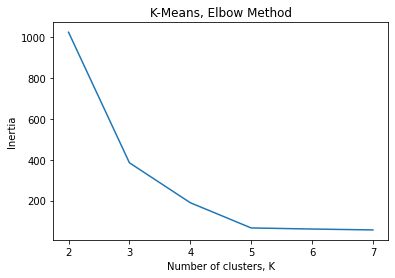

In [15]:
# Elbow chart
import matplotlib.pyplot as plt
plt.plot(range(2,8),wccs)
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");

In [16]:
# Based on the elbow method we can see cluster 5 is better, let’s check the silhouette score.
k_means1 = KMeans(init = "k-means++", n_clusters=5, n_init=20, random_state=42)
e_kmeans = k_means1.fit(Q1)
silhouette_score(Q1, e_kmeans.labels_)

0.8048976287755765

In [17]:
# Let's check if 5 is the magic number or would 6 perform better or worse on the silhouette score.
k_means2 = KMeans(init = "k-means++", n_clusters=6, n_init=20, random_state=42)
check_6 = k_means2.fit(Q1)
silhouette_score(Q1, check_6.labels_)

0.6331809452561232

In [18]:
# Yes 5 is the magic number.
# Let's move forward with the prediction.
y2 = e_kmeans.predict(Q1)
y2

array([1, 1, 1, 1, 2, 3, 1, 2, 2, 2, 4, 0, 0, 0, 1, 4, 1, 2, 2, 4, 0, 4,
       1, 2, 4, 3, 3, 1, 2, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1, 2, 3, 1,
       1, 3, 4, 3, 0, 1, 2, 0, 3, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 3, 3, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 3, 1, 4, 1, 2, 2, 0, 0, 1,
       1, 1, 1, 1, 3, 2, 1, 3, 0, 1, 1, 0, 0, 3, 0, 3, 0, 2, 2, 0, 0, 1,
       2, 0, 1, 0, 0, 0, 1, 0, 3, 2, 0, 2, 2, 2, 0, 4, 1, 2, 1, 1, 0, 1,
       0, 1, 3, 2, 4, 3, 1, 0, 2, 1, 1, 3, 1, 3, 1, 4, 1, 2, 1, 0, 2, 1,
       2, 4, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1,
       1, 2, 2, 2, 1, 1, 0, 3, 3, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 2, 3, 0,
       2, 2, 2, 0, 1, 0, 1, 0, 1, 2, 3, 1, 2, 2, 2, 2, 1, 2, 0, 3, 0, 2,
       1, 1, 0, 2, 0, 3, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 3, 1,
       1, 1, 4, 1, 0, 2, 3, 3, 3, 2, 1, 0, 2, 2, 0, 0, 1, 1, 4, 1, 1, 2,
       1, 2, 0, 3, 1, 0, 2, 1, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 0, 4, 0, 2,
       2, 0, 4, 2, 2, 3, 1, 0, 0, 1, 0, 2, 2, 0, 1,

In [19]:
y3 = e_kmeans.cluster_centers_
y3

array([[-1.08815238,  0.82744102, -0.75240648,  0.6270464 ],
       [ 0.03879611, -0.08524639,  1.02721559, -1.00569483],
       [ 1.19238486, -1.32510593, -0.67963841,  0.97016358],
       [-1.44466803,  1.46050665,  1.51057952, -1.57249636],
       [ 1.11876151,  1.23565419, -1.68367042,  0.59588052]])

In [20]:
scaler.inverse_transform(y3)

array([[    32.77777778, 105265.80952381,      0.30992613,
         14962.77806603],
       [    59.95541401,  72448.06369427,      0.77151837,
          6889.97218996],
       [    87.7755102 ,  27866.10204082,      0.32880046,
         16659.26144519],
       [    24.18      , 128029.12      ,      0.89689164,
          4087.52030859],
       [    86.        , 119944.04      ,      0.0683781 ,
         14808.68379288]])

In [21]:
# Add clusters to the dataframe. 
df_ks = df1.copy()
df_ks['Cluster ID'] = y2
df_ks

,Age,Income,SpendingScore,Savings,Cluster ID
0,58,77769,0.791329,6559.829923,1
1,59,81799,0.791082,5417.661426,1
2,62,74751,0.702657,9258.992965,1
3,59,74373,0.765680,7346.334504,1
4,87,17760,0.348778,16869.507130,2
...,...,...,...,...,...
500,28,101206,0.387441,14936.775389,0
501,93,19934,0.203140,17969.693769,2
502,90,35297,0.355149,16091.401954,2
503,91,20681,0.354679,18401.088445,2


## 1.2: Clustering Algorithm #2

**Hierarchical**

In [22]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
h = linkage(Q1, method = 'ward', metric = 'euclidean')

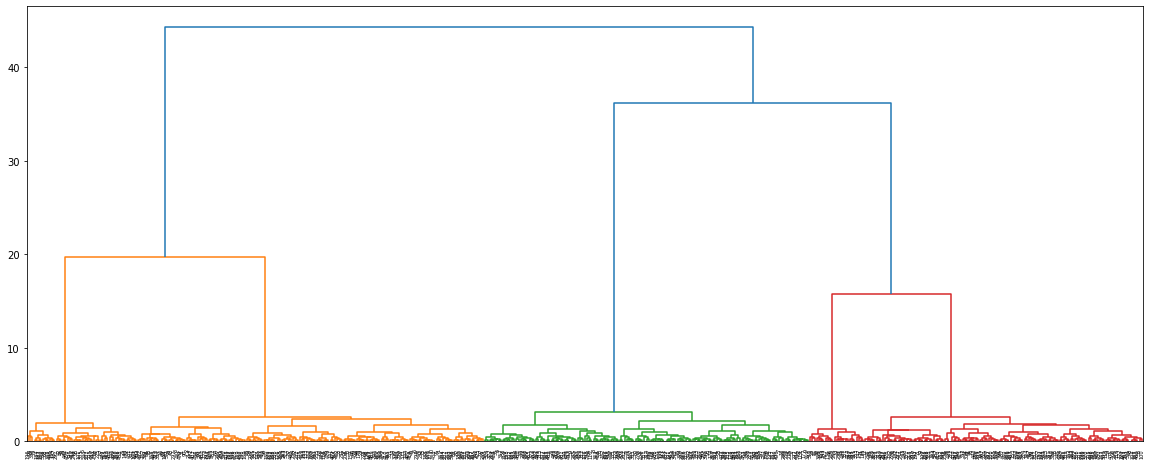

In [23]:
plt.figure(figsize=(20,8))
dendrogram(h);

In [24]:
# hyperparameter tuning
from sklearn.cluster import AgglomerativeClustering
def sil_score(clus,affiy):
  if affiy == 'euclidean':
    model = AgglomerativeClustering(n_clusters= clus, affinity= affiy, linkage='ward')
    model = model.fit_predict(Q1)
    print(f'Ward score:',silhouette_score(Q1,model))
    model = AgglomerativeClustering(n_clusters= clus, affinity= affiy, linkage='average')
    model = model.fit_predict(Q1)
    print(f'Average score:',silhouette_score(Q1,model))
    model = AgglomerativeClustering(n_clusters= clus, affinity= affiy, linkage='complete')
    model = model.fit_predict(Q1)
    print(f'Complete score:',silhouette_score(Q1,model))
    model = AgglomerativeClustering(n_clusters= clus, affinity= affiy, linkage='single')
    model = model.fit_predict(Q1)
    print(f'Sinlge score:',silhouette_score(Q1,model))
  elif affiy != 'euclidean':
    model = AgglomerativeClustering(n_clusters= clus, affinity= affiy, linkage='average')
    model = model.fit_predict(Q1)
    print(f'Average score:',silhouette_score(Q1,model))
    model = AgglomerativeClustering(n_clusters= clus, affinity= affiy, linkage='complete')
    model = model.fit_predict(Q1)
    print(f'Complete score:',silhouette_score(Q1,model))
    model = AgglomerativeClustering(n_clusters= clus, affinity= affiy, linkage='single')
    model = model.fit_predict(Q1)
    print(f'Sinlge score:',silhouette_score(Q1,model))

In [25]:
sil_score(4,'euclidean')

Ward score: 0.7581191889903789
Average score: 0.7325442796658956
Complete score: 0.7581191889903789
Sinlge score: 0.7325442796658956


In [26]:
sil_score(5,'euclidean')

Ward score: 0.8048976287755765
Average score: 0.8048976287755765
Complete score: 0.8048976287755765
Sinlge score: 0.8048976287755765


In [27]:
sil_score(6,'euclidean')

Ward score: 0.6277445976689177
Average score: 0.772038481736425
Complete score: 0.6296260843155621
Sinlge score: 0.6766520025179419


In [28]:
sil_score(4,'manhattan')

Average score: 0.7581191889903789
Complete score: 0.7581191889903789
Sinlge score: 0.7325442796658956


In [29]:
sil_score(5,'manhattan')

Average score: 0.8048976287755765
Complete score: 0.8048976287755765
Sinlge score: 0.8048976287755765


In [30]:
sil_score(6,'manhattan')

Average score: 0.772038481736425
Complete score: 0.7451279051313525
Sinlge score: 0.6766520025179419


In [31]:
sil_score(4,'cosine')

Average score: 0.7325442796658956
Complete score: 0.7325442796658956
Sinlge score: 0.7325442796658956


In [32]:
sil_score(5,'cosine')

Average score: 0.8048976287755765
Complete score: 0.8048976287755765
Sinlge score: 0.8048976287755765


In [33]:
sil_score(6,'cosine')

Average score: 0.6706884473286785
Complete score: 0.6142189070572904
Sinlge score: 0.6766520025179419


Based on the above results 5 is once again the magic number and the distance metric and linkage changes don't matter that much. 

In [34]:
import scipy.cluster
aggl = scipy.cluster.hierarchy.linkage(Q1, method='ward', metric='euclidean')

In [35]:
K = 5
labels = scipy.cluster.hierarchy.fcluster(aggl, K, criterion="maxclust")

In [36]:
df1['Cluster ID'] = labels
df1

,Age,Income,SpendingScore,Savings,Cluster ID
0,58,77769,0.791329,6559.829923,2
1,59,81799,0.791082,5417.661426,2
2,62,74751,0.702657,9258.992965,2
3,59,74373,0.765680,7346.334504,2
4,87,17760,0.348778,16869.507130,3
...,...,...,...,...,...
500,28,101206,0.387441,14936.775389,5
501,93,19934,0.203140,17969.693769,3
502,90,35297,0.355149,16091.401954,3
503,91,20681,0.354679,18401.088445,3


In [37]:
df2 = df1.drop(['Cluster ID'], axis = 1)
col_names = df2.columns
df2.columns

Index(['Age', 'Income', 'SpendingScore', 'Savings'], dtype='object')

In [38]:
Q1

array([[-0.04228713,  0.06273305,  1.10359261, -1.07246676],
       [-0.00082111,  0.17481053,  1.10264136, -1.30347264],
       [ 0.12357696, -0.02119992,  0.76172738, -0.52655561],
       ...,
       [ 1.2846256 , -1.11844679, -0.57805422,  0.85531285],
       [ 1.32609162, -1.52492929, -0.57986567,  1.32245159],
       [ 1.24315958, -1.25833506, -0.83188962,  0.51046305]])

In [39]:
Q1_df = pd.DataFrame(scaler.inverse_transform(Q1), columns=col_names)
Q1_df['Cluster'] = labels
Q1_df

,Age,Income,SpendingScore,Savings,Cluster
0,58.0,77769.0,0.791329,6559.829923,2
1,59.0,81799.0,0.791082,5417.661426,2
2,62.0,74751.0,0.702657,9258.992965,2
3,59.0,74373.0,0.765680,7346.334504,2
4,87.0,17760.0,0.348778,16869.507130,3
...,...,...,...,...,...
500,28.0,101206.0,0.387441,14936.775389,5
501,93.0,19934.0,0.203140,17969.693769,3
502,90.0,35297.0,0.355149,16091.401954,3
503,91.0,20681.0,0.354679,18401.088445,3


In [40]:
c2_group = Q1_df.groupby(['Cluster']).agg('describe') 
c2_group

Age                                                    Income  \
         count       mean       std   min   25%   50%   75%   max  count   
Cluster                                                                    
1         50.0  24.180000  3.662775  17.0  22.0  24.5  27.0  31.0   50.0   
2        157.0  59.955414  3.376662  51.0  58.0  59.0  62.0  68.0  157.0   
3        147.0  87.775510  3.508885  79.0  85.0  88.0  91.0  97.0  147.0   
4         25.0  86.000000  3.662877  77.0  84.0  86.0  88.0  93.0   25.0   
5        126.0  32.777778  3.792390  22.0  30.0  33.0  35.0  44.0  126.0   

                        ... SpendingScore           Savings                \
                  mean  ...           75%       max   count          mean   
Cluster                 ...                                                 
1        128029.120000  ...      0.926473  1.000000    50.0   4087.520309   
2         72448.063694  ...      0.800598  0.910417   157.0   6889.972190   
3         27866.102041  ...      0.357267  0.473550   147.0  16659.261445   
4        119944.040000  ...      0.082723  0.155694    25.0  14808.683793   
5        105265.809524  ...      0.341096  0.411112   126.0  14962.778066   

                                                                              \
                 std           min           25%           50%           75%   
Cluster                                                                        
1        1277.754801      0.000000   3275.320193   4361.967019   4986.863329   
2        1052.276354   4077.658657   6225.376082   6845.056822   7497.231607   
3        1183.850178  13470.970605  15957.282919  16711.067980  17433.126684   
4        1159.339639  12554.692742  14047.388986  14773.407206  15391.952192   
5        1061.734017  12207.526078  14223.787562  14976.943192  15682.288845   

                       
                  max  
Cluster                
1         6089.478323  
2        10547.775368  
3        20000.000000  
4        17833.093470  
5        17968.553929  

[5 rows x 32 columns]

In [41]:
# Showing all features stats together.
with pd.option_context("display.max_columns", None):
    display(c2_group)

Age                                                    Income  \
         count       mean       std   min   25%   50%   75%   max  count   
Cluster                                                                    
1         50.0  24.180000  3.662775  17.0  22.0  24.5  27.0  31.0   50.0   
2        157.0  59.955414  3.376662  51.0  58.0  59.0  62.0  68.0  157.0   
3        147.0  87.775510  3.508885  79.0  85.0  88.0  91.0  97.0  147.0   
4         25.0  86.000000  3.662877  77.0  84.0  86.0  88.0  93.0   25.0   
5        126.0  32.777778  3.792390  22.0  30.0  33.0  35.0  44.0  126.0   

                                                                               \
                  mean          std       min        25%       50%        75%   
Cluster                                                                         
1        128029.120000  5688.904656  117108.0  123042.00  128162.0  131435.75   
2         72448.063694  6240.260008   56321.0   68463.00   72027.0   76594.00   
3         27866.102041  6448.805481   12000.0   23361.00   27771.0   32601.00   
4        119944.040000  4941.052254  110582.0  117347.00  119429.0  123651.00   
5        105265.809524  6080.621753   89598.0  100760.25  106002.5  108858.75   

                  SpendingScore                                          \
              max         count      mean       std       min       25%   
Cluster                                                                   
1        142000.0          50.0  0.896892  0.043466  0.806553  0.871957   
2         90422.0         157.0  0.771518  0.046058  0.657314  0.740367   
3         46977.0         147.0  0.328800  0.045224  0.203140  0.301502   
4        128596.0          25.0  0.068378  0.039744  0.000000  0.036795   
5        119877.0         126.0  0.309926  0.045513  0.174120  0.281237   

                                      Savings                             \
              50%       75%       max   count          mean          std   
Cluster                                                                    
1        0.890676  0.926473  1.000000    50.0   4087.520309  1277.754801   
2        0.766720  0.800598  0.910417   157.0   6889.972190  1052.276354   
3        0.324719  0.357267  0.473550   147.0  16659.261445  1183.850178   
4        0.063273  0.082723  0.155694    25.0  14808.683793  1159.339639   
5        0.309479  0.341096  0.411112   126.0  14962.778066  1061.734017   

                                                                               
                  min           25%           50%           75%           max  
Cluster                                                                        
1            0.000000   3275.320193   4361.967019   4986.863329   6089.478323  
2         4077.658657   6225.376082   6845.056822   7497.231607  10547.775368  
3        13470.970605  15957.282919  16711.067980  17433.126684  20000.000000  
4        12554.692742  14047.388986  14773.407206  15391.952192  17833.093470  
5        12207.526078  14223.787562  14976.943192  15682.288845  17968.553929

In [42]:
# Stats per feature.
c2_group['Age']

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
1,50.0,24.180000,3.662775,17.0,22.0,24.5,27.0,31.0
2,157.0,59.955414,3.376662,51.0,58.0,59.0,62.0,68.0
3,147.0,87.775510,3.508885,79.0,85.0,88.0,91.0,97.0
4,25.0,86.000000,3.662877,77.0,84.0,86.0,88.0,93.0
5,126.0,32.777778,3.792390,22.0,30.0,33.0,35.0,44.0


In [43]:
c2_group['Income']

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
1,50.0,128029.120000,5688.904656,117108.0,123042.00,128162.0,131435.75,142000.0
2,157.0,72448.063694,6240.260008,56321.0,68463.00,72027.0,76594.00,90422.0
3,147.0,27866.102041,6448.805481,12000.0,23361.00,27771.0,32601.00,46977.0
4,25.0,119944.040000,4941.052254,110582.0,117347.00,119429.0,123651.00,128596.0
5,126.0,105265.809524,6080.621753,89598.0,100760.25,106002.5,108858.75,119877.0


In [44]:
c2_group['SpendingScore']

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
1,50.0,0.896892,0.043466,0.806553,0.871957,0.890676,0.926473,1.000000
2,157.0,0.771518,0.046058,0.657314,0.740367,0.766720,0.800598,0.910417
3,147.0,0.328800,0.045224,0.203140,0.301502,0.324719,0.357267,0.473550
4,25.0,0.068378,0.039744,0.000000,0.036795,0.063273,0.082723,0.155694
5,126.0,0.309926,0.045513,0.174120,0.281237,0.309479,0.341096,0.411112


In [45]:
c2_group['Savings']

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
1,50.0,4087.520309,1277.754801,0.000000,3275.320193,4361.967019,4986.863329,6089.478323
2,157.0,6889.972190,1052.276354,4077.658657,6225.376082,6845.056822,7497.231607,10547.775368
3,147.0,16659.261445,1183.850178,13470.970605,15957.282919,16711.067980,17433.126684,20000.000000
4,25.0,14808.683793,1159.339639,12554.692742,14047.388986,14773.407206,15391.952192,17833.093470
5,126.0,14962.778066,1061.734017,12207.526078,14223.787562,14976.943192,15682.288845,17968.553929


# Results 

**Cluster 1**

Number of Instances: 50

|         | Mean           | Min | Max  |
| ------------- |------------| ------------| -----:|
| **Age**      |24.2 | 17 | 31
| **Income**   | \$128,029 | \$117,108| \$142,000
| **Spending Score**   | 0.89 | 0.80| 1
| **Savings**   | \$4,087 | \$0| \$6,089

**Cluster 2**

Number of Instances: 157

|         | Mean           | Min | Max  |
| ------------- |------------| ------------|  -----:|
| **Age**      |59.9 | 51 | 68
| **Income**   | \$72,448 | \$56,321| \$90,422
| **Spending Score**   | 0.77 | 0.65| 0.91
| **Savings**   | \$6,889 | \$4,077| \$10,547

**Cluster 3**

Number of Instances: 147

|         | Mean           | Min | Max  |
| ------------- |------------| ------------|  -----:|
| **Age**      | 87.8 | 79 | 97
| **Income**   | \$27,866 | \$12,000| \$46,977
| **Spending Score**   | 0.33 | 0.20| 0.47
| **Savings**   | \$16,659 | \$13,470| \$20,000

**Cluster 4**

Number of Instances: 25

|         | Mean           | Min | Max  |
| ------------- |------------| ------------|  -----:|
| **Age**      | 86 | 77| 93
| **Income**   | \$119,944 | \$110,582| \$128,596
| **Spending Score**   | 0.06 | 0.00| 0.16
| **Savings**   | \$14,808 | \$12,554| \$17,833

**Cluster 5**

Number of Instances: 126

|         | Mean           | Min | Max  |
| ------------- |------------| ------------|  -----:|
| **Age**      |32.8 | 22| 44
| **Income**   | \$	105,265 | \$89,598| \$119,877
| **Spending Score**   | 0.31 | 0.17| 0.41
| **Savings**   | \$14,962 | \$12,207| \$17,968